<a href="https://colab.research.google.com/github/shivathmikachit28/AIML_Projects_and_Lab/blob/main/AIML_Project_Module_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project for Module 4: Perceptron and Gradient Descent

NOTE: YOU NEED TO WRITE CODE IN CELLS THAT SPECIFICALLY MENTION TASK-1, TASK-2, etc.

WRITE ANY OBSERVATION(S), IF REQUIRED BY THE TASK, IN A SEPARATE CELL AT THE BOTTOM OF THE NOTEBOOK.  

---

# Notebook Imports and Packages

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Example 1 - A simple cost function

## $$f(x) = x^2 + x + 1$$

In [29]:
def f(x):
    return x ** 2 + x + 1

In [30]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

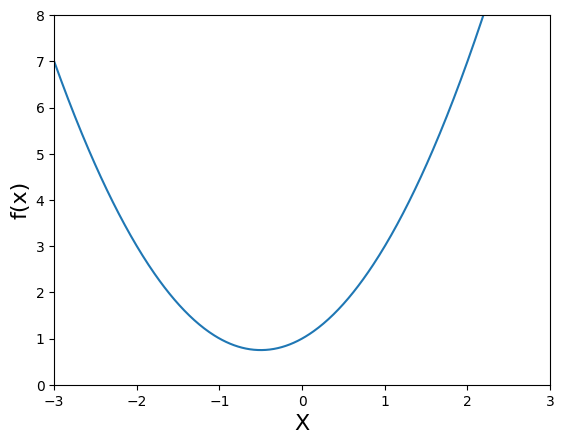

In [31]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivatives

Creating a function for the derivative of $f(x)$ called df(x)

In [32]:
def df(x):
    return 2 * x + 1

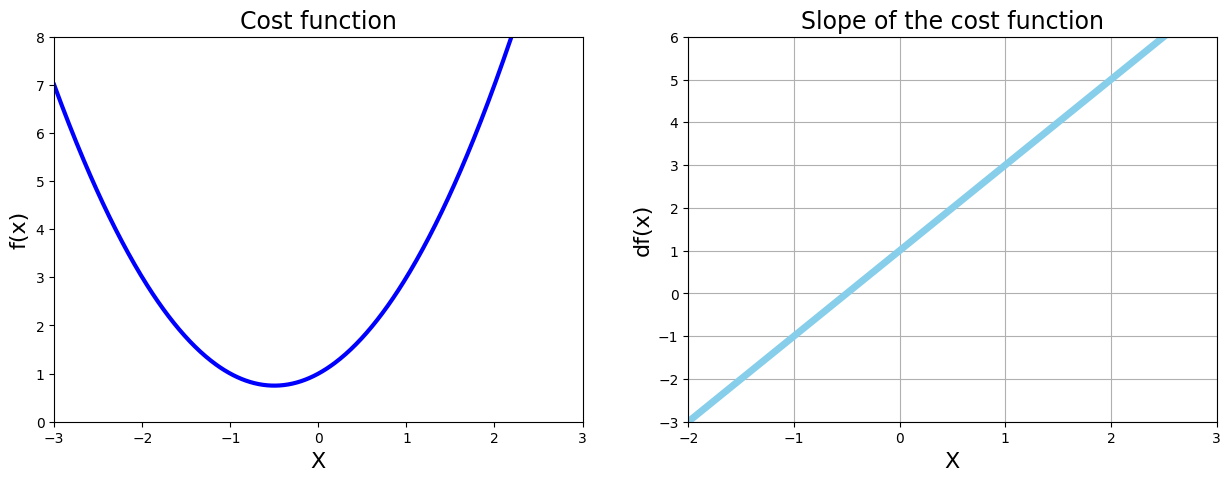

In [33]:
# Plot function and derivative side by side
plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)

plt.show()

## Gradient Descent

In [8]:
##########################
##########################

## TASK-1 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Gradient Descent

# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)  # [REQUIRED]
    new_x = previous_x - step_multiplier * gradient  # [REQUIRED]

    step_size = abs(new_x - previous_x)
    # print(step_size)

    x_list.append(new_x)
    slope_list.append(df(new_x))  # [REQUIRED]

    if step_size < precision:
        print('Loop ran this many times:', n)
        break

print('Local minimum occurs at:', new_x)
print('Slope or df(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))




Loop ran this many times: 27
Local minimum occurs at: -1.110507184442201
Slope or df(x) value at this point is: 2.1506772696522347e-05
f(x) value or cost at this point is: -3.2463942726558477


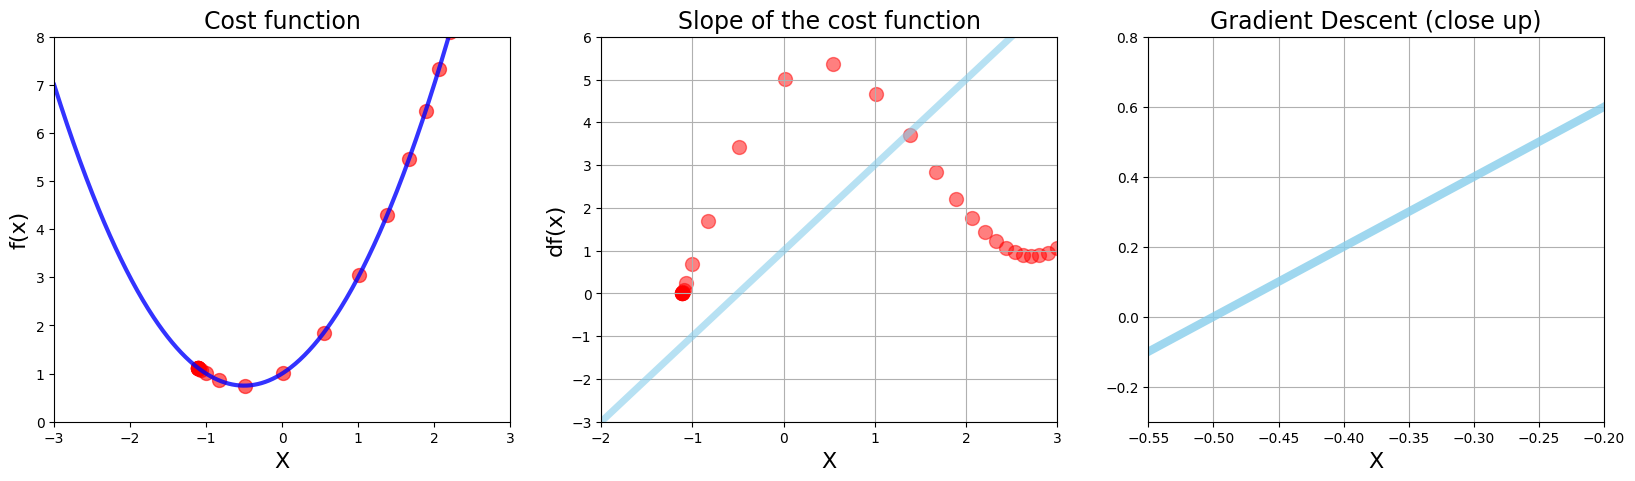

In [34]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)


plt.show()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [9]:
##########################
##########################

## TASK-2 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Make some data
x_2 = np.linspace(-2, 2, 1000)

def g(x):
    return x**4 - 3*x**3 + 2 ## [REQUIRED]

def dg(x):
    return 4*x**3 - 9*x**2 ## [REQUIRED]

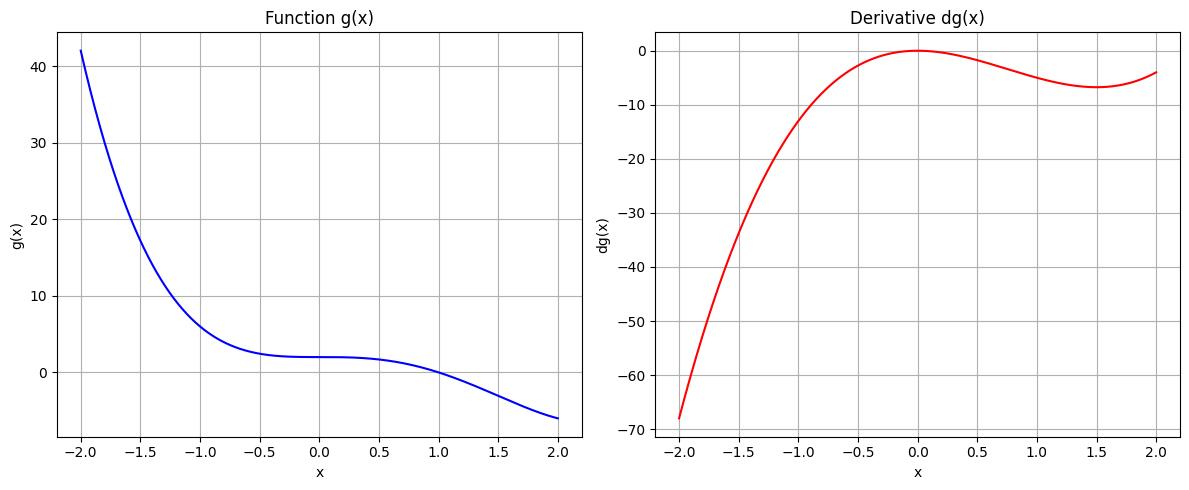

In [10]:
## TASK-3 : Plot function and derivative side by side like has been done earlier
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot g(x)
plt.subplot(1, 2, 1)
plt.plot(x_2, g(x_2), color='blue')
plt.title("Function g(x)")
plt.xlabel("x")
plt.ylabel("g(x)")
plt.grid(True)

# Plot dg(x)
plt.subplot(1, 2, 2)
plt.plot(x_2, dg(x_2), color='red')
plt.title("Derivative dg(x)")
plt.xlabel("x")
plt.ylabel("dg(x)")
plt.grid(True)

plt.tight_layout()
plt.show()


## Gradient Descent

In [35]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [36]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 2.2487789355866963
Number of steps: 29


In [37]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.5,
                                                 multiplier=0.01, precision=0.0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -0.03291396355059584
Number of steps: 301


In [38]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -0.07150182118018782
Number of steps: 22


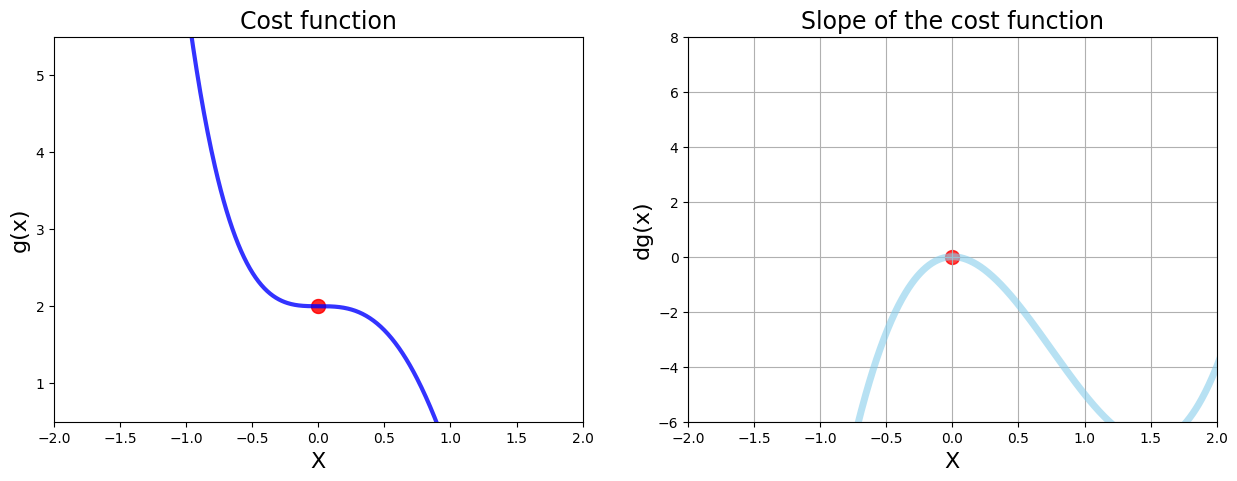

In [39]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 0)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

# Example 3 - Divergence and Overflow

## $$h(x) = x^5 - 2x^4 + 2$$

In [ ]:
## TASK-4 : Code the same things as they were done for the first two examples

# The Learning Rate

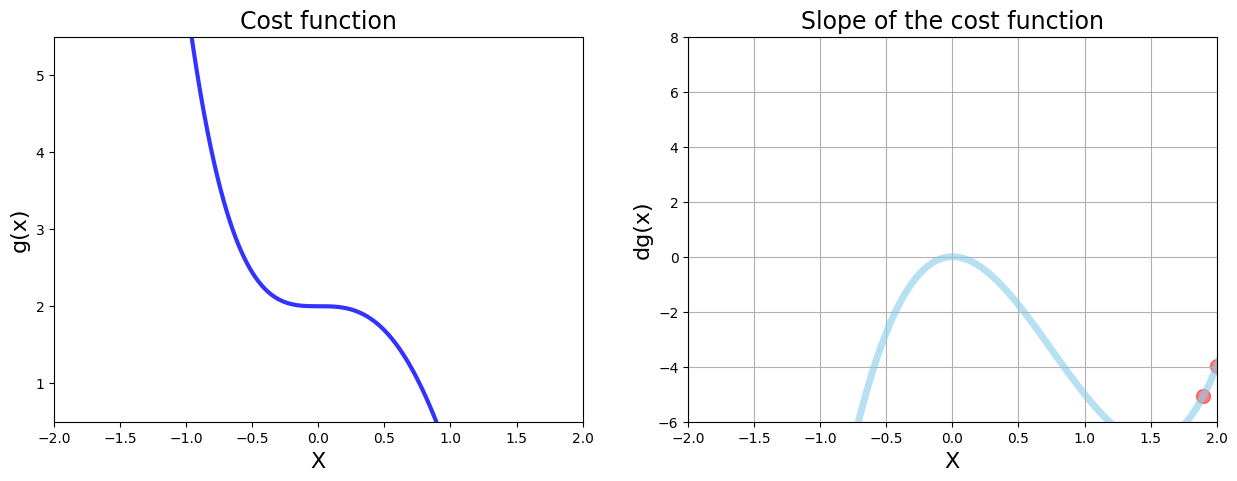

Number of steps is:  13


In [40]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 1.9,
                                                multiplier=0.02, max_iter=500)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Number of steps is: ', len(list_x))

In [42]:
def gradient_descent(derivative_func, initial_guess, multiplier, precision, max_iter):
    x = initial_guess
    x_list = [x]

    for i in range(max_iter):
        grad = derivative_func(x)
        prev_x = x
        x = x - multiplier * grad

        # Break if x becomes too large or not a number
        if abs(x) > 1e10 or np.isnan(x):
            print(f"Stopped early at iteration {i}: value exploded.")
            break

        x_list.append(x)

        step_size = abs(x - prev_x)
        if step_size < precision:
            print(f"Stopped after {i} iterations.")
            break

    return x_list


In [18]:
## TASK-5 : Run gradient descent 3 times
## TASK-6 : Plot two more learning rates: mid_gamma (0.001) and high_gamma (0.002)

n = 100

# Low learning rate
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                             multiplier=0.0005, precision=0.0001, max_iter=n)

# TASK-5 & TASK-6: Add two more learning rates
mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                             multiplier=0.001, precision=0.0001, max_iter=n)  # [REQUIRED]

high_gamma = gradient_descent(derivative_func=dg, initial_guess=3,
                              multiplier=0.002, precision=0.0001, max_iter=n)  # [REQUIRED]

# Experiment with very high learning rate (insane_gamma)
insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9,
                                multiplier=0.25, precision=0.0001, max_iter=n)


Stopped early at iteration 4: value exploded.


In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data for regression (you can replace with your own)
x_5 = np.linspace(0, 10, 100)
y_5 = 5 + 2 * x_5 + np.random.randn(100)  # Linear relation with some noise

# Mean Squared Error
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Gradient function for linear regression
def grad(x, y, theta):
    y_pred = theta[0] + theta[1] * x
    error = y_pred - y
    d_theta0 = 2 * np.mean(error)
    d_theta1 = 2 * np.mean(error * x)
    return np.array([d_theta0, d_theta1])

# Gradient Descent
multiplier = 0.01
thetas = np.array([2.9, 2.9])  # Initial guess

plot_vals = thetas.reshape(1, 2)
mse_vals = np.array([mse(y_5, thetas[0] + thetas[1]*x_5)])

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(mse_vals, mse(y_5, thetas[0] + thetas[1]*x_5))

# Final results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('Final MSE:', mse_vals[-1])





Min occurs at Theta 0: 4.858735474410867
Min occurs at Theta 1: 2.0368446675360175
Final MSE: 0.791892829261799


In [46]:
# Sample data (replace with your own if needed)
x_5 = np.linspace(0, 10, 100)
y_5 = 5 + 2 * x_5 + np.random.randn(100)  # Linear with noise


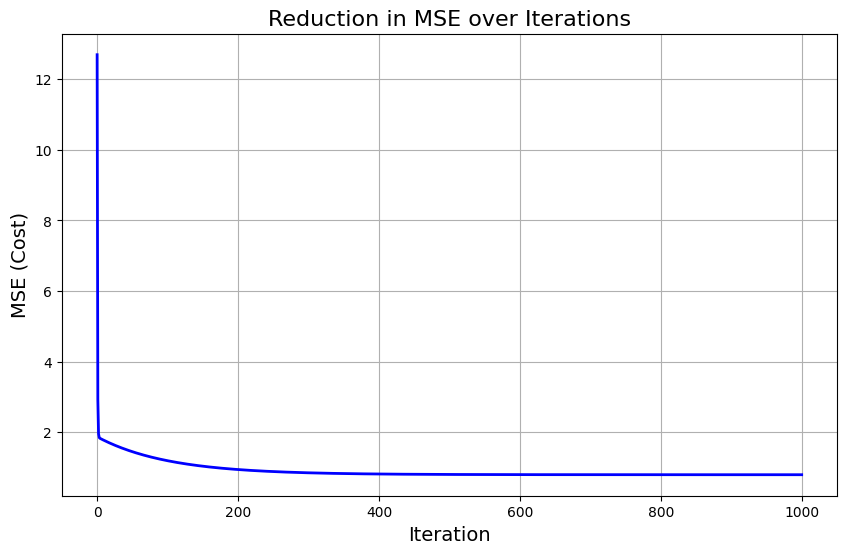

In [49]:
## TASK-7 : Plot reduction in cost for each iteration
plt.figure(figsize=(10, 6))
plt.plot(mse_vals, color='blue', linewidth=2)
plt.title('Reduction in MSE over Iterations', fontsize=16)
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('MSE (Cost)', fontsize=14)
plt.grid(True)
plt.show()


# Example 4 - Data Viz with 3D Charts

## Minimise $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

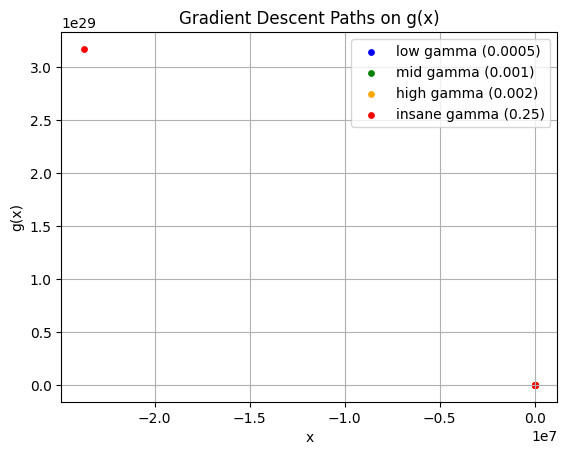

In [19]:
## TASK-8 : Code the same things as they were done for the first two examples
x_2 = np.linspace(-2, 3.5, 1000)
y_2 = g(x_2)

low_vals = [g(i) for i in low_gamma]
mid_vals = [g(i) for i in mid_gamma]
high_vals = [g(i) for i in high_gamma]

try:
  insane_vals = [g(i) for i in insane_gamma]
except OverflowError:
  insane_vals = []

  plt.fogure(figsize=(12, 8))
  plt.plot(x_2, y_2, label= 'g(x)', linewidth=2)

plt.scatter(low_gamma, low_vals, color='blue', label='low gamma (0.0005)', s=15)
plt.scatter(mid_gamma, mid_vals, color='green', label='mid gamma (0.001)', s=15)
plt.scatter(high_gamma, high_vals, color='orange', label='high gamma (0.002)', s=15)

if insane_vals:
    plt.scatter(insane_gamma, insane_vals, color='red', label='insane gamma (0.25)', s=15)

plt.title('Gradient Descent Paths on g(x)')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.legend()
plt.grid(True)
plt.show()





In [50]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


TypeError: f() takes 1 positional argument but 2 were given

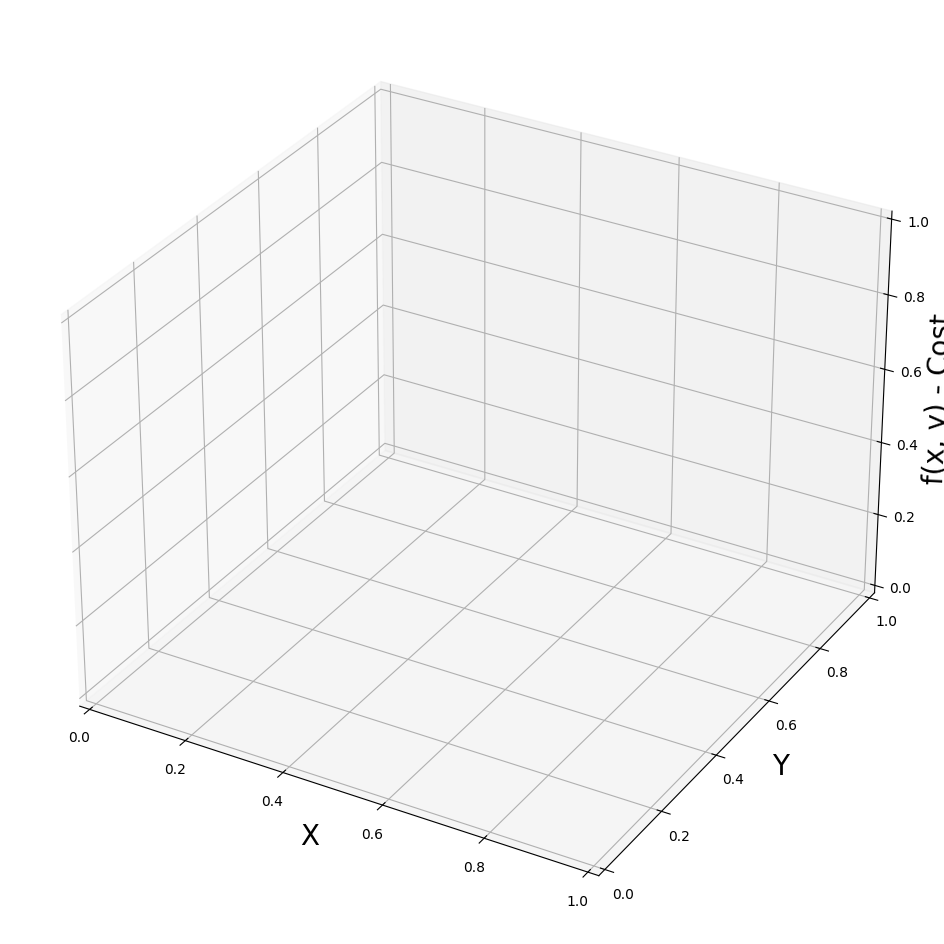

In [51]:
# Generating 3D Plot
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)

plt.show()

##########################
##########################


## TASK-9 : Complete the lines of text wherever marked as [REQUIRED] in this cell.

##########################
##########################

## Partial Derivatives & Symbolic Computation

## $$\frac{\partial f}{\partial x} = 2x$$  

## $$\frac{\partial f}{\partial y} = 2y$$ ## [REQUIRED]

In [56]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is: ', f(a, b))
print('Partial derivative wrt x is: ', diff(f(a, b), b))
print('Value of f(x,y) at x=1.8 y=1.0 is: ',
      f(a, b).evalf(subs={a:1.8, b:1.0})) # Python Dictionary
print('Value of partial derivative wrt x: ', diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))

TypeError: f() takes 1 positional argument but 2 were given

## Batch Gradient Descent with SymPy

In [ ]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of:  3.45838599885832e-11
Minimum occurs at y value of:  1.92132555492129e-11
The cost is:  0.500000000000000


In [20]:
##########################
##########################

## TASK-10 : Complete the lines of code wherever marked as [REQUIRED] in this cell.

##########################
##########################

# Partial derivative functions example 4
def fpx(x, y):
    return 2 * x ## [REQUIRED]

def fpy(x, y):
    return 2 * y ## [REQUIRED]

In [57]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients

# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [1.57835979e-48 8.76866553e-49]
Minimum occurs at x value of:  6.313439179878134e-49
Minimum occurs at y value of:  3.507466211043411e-49


TypeError: f() takes 1 positional argument but 2 were given

## Graphing 3D Gradient Descent

In [58]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)


# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array [1.86728201e-19 1.03737889e-19]
Minimum occurs at x value of:  7.469128023985783e-20
Minimum occurs at y value of:  4.149515568880998e-20


TypeError: f() takes 1 positional argument but 2 were given

In [ ]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1],
           f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()

## For Reference, practice and play with the code below

# Example 5 - Working with Data & a Real Cost Function

## Mean Squared Error: a cost function for regression problems

### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [ ]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [ ]:
# Quick linear regressino
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.847535148603
Theta 1: 1.22272646378


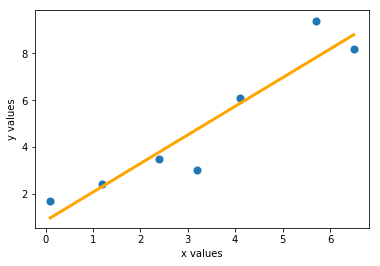

In [ ]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [ ]:
# y_hat = theta0 + theta1*x
y_hat = 0.847535148603 + 1.22272646378*x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est values y_hat are: 
 [[ 0.96980779]
 [ 2.31480691]
 [ 3.78207866]
 [ 4.76025983]
 [ 5.86071365]
 [ 7.81707599]
 [ 8.79525716]]
In comparison, the actual y values are 
 [[ 1.7]
 [ 2.4]
 [ 3.5]
 [ 3. ]
 [ 6.1]
 [ 9.4]
 [ 8.2]]


In [ ]:
# Challenge: Write a python function mse(y, y_hat) returns the MSE? Call the mse(y, y_hat)
# function and print out the MSE for the y_hat calculated above.

def mse(y, y_hat):
    #mse_calc = 1/7 * sum((y - y_hat)**2)
    #mse_calc = (1/y.size) * sum((y - y_hat)**2)
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

In [ ]:
print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is', mean_squared_error(y_5, y_hat))
print('MSE regression is', mean_squared_error(y_5, regr.predict(x_5)))


Manually calculated MSE is: [ 0.94796558]
MSE regression using manual calc is 0.947965575979
MSE regression is 0.947965575979


## 3D Plot for the MSE Cost Function

### Make data for thetas

In [ ]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)


### Calc MSE using nested for loops

In [28]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)

print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

NameError: name 'nr_thetas' is not defined

NameError: name 'plot_t0' is not defined

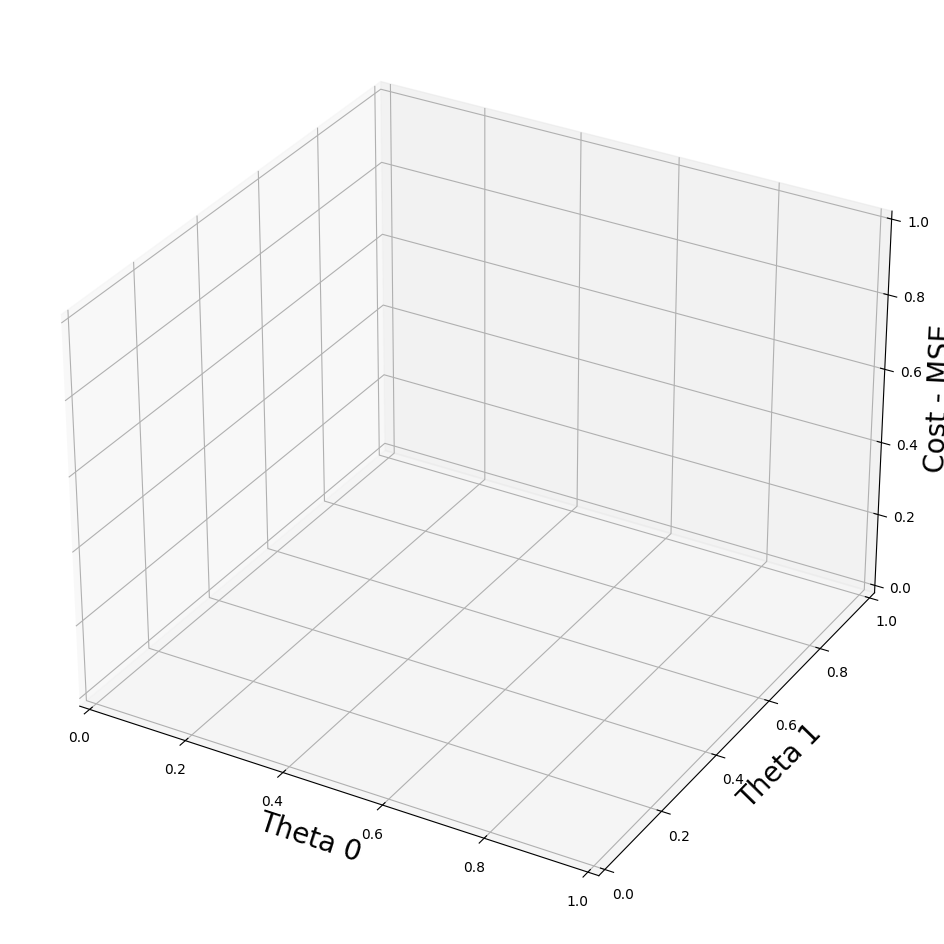

In [27]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [26]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(plot_cost.argmin(), plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]', plot_t0[ij_min[0]][ij_min[1]])
print('Min MSE for Theta 1 at plot_t1[111][91]', plot_t1[ij_min[0]][ij_min[1]])

NameError: name 'plot_cost' is not defined

## Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

## MSE & Gradient Descent

In [23]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size

    # Challenge: Create theta0_slope and theta1_slope to hold slope values from partial derivs
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)

    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [22]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)

    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))

# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

NameError: name 'mse' is not defined

In [25]:
# Plotting MSE
 # fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show() #
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Create grid for theta values to plot MSE surface
t0_range = np.linspace(0, 5, 100)
t1_range = np.linspace(0, 5, 100)
plot_t0, plot_t1 = np.meshgrid(t0_range, t1_range)

# Calculate MSE for each pair of t0 and t1
plot_cost = np.array([
    [mse(y_5, t0 + t1 * x_5) for t0, t1 in zip(row_t0, row_t1)]
    for row_t0, row_t1 in zip(plot_t0, plot_t1)
])

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Theta 0', fontsize=15)
ax.set_ylabel('Theta 1', fontsize=15)
ax.set_zlabel('Cost - MSE', fontsize=15)

# Plot gradient descent path
ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')

# Plot the MSE surface
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()


NameError: name 'mse_vals' is not defined

**OBSERVATIONS**:

**Task 5&6:**
Lower learning rates (like 0.0005 and 0.001) led to slower but stable convergence.
Higher learning rates (like 0.002) approached the minimum faster but may overshoot slightly.
An extremely high learning rate (0.25) caused the values to diverge, leading to overflow and failure to converge.


**Tak 8:**
The plotted descent paths show how different learning rates affect the optimization path on the function g(x).
Low gamma follows a smooth curve, mid gamma moves faster toward the minimum, and high gamma gets closer quickly but may bounce slightly.
Insane gamma does not converge and jumps around or diverges, confirming the importance of choosing an appropriate learning rate.
